In [1]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [2]:
# Choose data set
E866 = 1
E772 = 1
E906 = 1
HERMES = 1
ATLAS = 1
RHIC = 1
CMS5 = 1
CMS8 = 1
JLAB = 1

print('Processing replica data.')

Processing replica data.


In [3]:
pwd = os.getcwd()
#pwd = pwd + '/Nuclear-TMDs/plots'
path2dat = pwd + '/'
dfinit = pd.read_csv(path2dat+'collected_results.txt', delimiter = ',',delim_whitespace=True)
exception_is = []
dfinit = dfinit['rep'].tolist()
dfinit = []
for i in range(201):
    if i not in exception_is:
        dfinit.append(i)
print (dfinit)
maxlib = {}
barlib = {}
minlib = {}
datalst = os.listdir(path2dat+'data_reps/data_rep_000/')
jlabdatalst = []


newdatalst = []
if E866 == 1:
    for address in datalst:
        if ('E866' in address):
            newdatalst.append(address)

if E772 == 1:
    for address in datalst:
        if ('E772' in address):
            newdatalst.append(address)
            

if E906 == 1:
    for address in datalst:
        if ('E906' in address):
            newdatalst.append(address)            

if HERMES == 1:
    hermesdatalst = os.listdir(path2dat + 'data_reps/data_rep_000/HERMES/')

if ATLAS == 1:
    for address in datalst:
        if ('ATLAS' in address):
            newdatalst.append(address)
        
if RHIC == 1:
    for address in datalst:
        if ('RHIC' in address):
            newdatalst.append(address)
            
if CMS5 == 1:
    for address in datalst:
        if ('CMS5' in address):
            newdatalst.append(address)
            
if CMS8 == 1:
    for address in datalst:
        if ('CMS8' in address):
            newdatalst.append(address)

if JLAB == 1:
    for address in datalst:
        if ('Clas' in address):
            jlabdatalst.append(address)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [4]:
hermesmaxlib = {}
hermesbarlib = {}
hermesminlib = {}

In [5]:
for _fp in newdatalst:
    print(_fp)
    maxlib[_fp] = []
    minlib[_fp] = []
    barlib[_fp] = []
    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/'+_fp, delimiter = ',',delim_whitespace=True))):
        for rep in dfinit:
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/'+_fp
                df1 = pd.read_csv(fp1, delimiter = ',',delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        if 'E866' in _fp or 'E772' in _fp:
                sortedlst = sorted(df['R_dy'].tolist())
                #print(int(len(sortedlst)/100.*15.))
                #print(int(len(sortedlst)/100.*84.))
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp].append(sortedlst[upcutoff])
                minlib[_fp].append(sortedlst[downcutoff])
                barlib[_fp].append(df['R_dy'].iloc[0])
        if 'ATLAS' in _fp or 'CMS5' in _fp or 'RHIC' in _fp or 'E906' in _fp or 'CMS8' in _fp:
                sortedlst = sorted(df['FUU'].tolist())
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp].append(sortedlst[upcutoff])
                minlib[_fp].append(sortedlst[downcutoff])
                barlib[_fp].append(df['FUU'].iloc[0])

E866_800_Qbin_WBe.dat
E866_800_WBe.dat
E866_800_FeBe.dat
E866_800_Qbin_FeBe.dat
E772_800_FeD.dat
E772_800_WD.dat
E772_800_CD.dat
E772_800_CaD.dat
E906_W.dat
E906_C.dat
E906_FE.dat
ATLAS5_Y2.dat
ATLAS5_Y3.dat
ATLAS5_Y1.dat
RHIC_Ratio_pAu1.dat
RHIC_Ratio_pAu2.dat
CMS5.dat
CMS8_DY_fid.dat
CMS8_DY_no.dat
CMS8_ZZ_fid.dat
CMS8_ZZ_no.dat


In [6]:
cutlst = []
cutlst.append(hermesdatalst[1])
cutlst

['pi0_kr_q2.dat']

In [7]:
for _fp in hermesdatalst:
    print(_fp)
    maxlib[_fp] = []
    minlib[_fp] = []
    barlib[_fp] = []
    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/HERMES/'+_fp, delimiter = ',',delim_whitespace=True))):
        for rep in dfinit:
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/HERMES/'+_fp
                df = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/HERMES/'+_fp
                df1 = pd.read_csv(fp1, delimiter = ',',delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        if 'pi' in _fp:
                ratio = df['fuua']/df['fuu']/df['DIS']
                sortedlst = sorted(ratio.tolist())
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp].append(sortedlst[upcutoff])
                minlib[_fp].append(sortedlst[downcutoff])
                barlib[_fp].append(ratio.iloc[0])

pi0_xe_q2.dat
pi0_kr_q2.dat
pim_kr_pt2.dat
pim_xe_z.dat
pim_ne_q2.dat
pim_kr_z.dat
pip_he_pt2.dat
pip_he_nu.dat
pim_xe_nu.dat
pim_ne_z.dat
pim_kr_nu.dat
pi0_he_pt2.dat
pi0_ne_nu.dat
pim_xe_pt2.dat
pip_ne_pt2.dat
pim_kr_q2.dat
pi0_ne_pt2.dat
pip_he_q2.dat
pim_xe_q2.dat
pi0_ne_q2.dat
pi0_kr_nu.dat
pi0_xe_nu.dat
pim_he_z.dat
pim_ne_nu.dat
pi0_ne_z.dat
pip_ne_nu.dat
pi0_kr_z.dat
pi0_he_nu.dat
pip_xe_z.dat
pim_ne_pt2.dat
pip_ne_z.dat
pip_kr_z.dat
pim_he_q2.dat
pip_xe_q2.dat
pip_kr_q2.dat
pi0_xe_z.dat
pim_he_pt2.dat
pip_kr_nu.dat
pi0_xe_pt2.dat
pim_he_nu.dat
pip_xe_nu.dat
pi0_he_z.dat
pip_xe_pt2.dat
pip_ne_q2.dat
pip_kr_pt2.dat
pip_he_z.dat
pi0_kr_pt2.dat
pi0_he_q2.dat


In [8]:
for _fp in jlabdatalst:
    print(_fp)
    maxlib[_fp] = {}
    minlib[_fp] = {}
    barlib[_fp] = {}
    maxlib[_fp]['C'] = []
    maxlib[_fp]['Fe'] = []
    maxlib[_fp]['Pb'] = [] 
    minlib[_fp]['C'] = []
    minlib[_fp]['Fe'] = []
    minlib[_fp]['Pb'] = [] 
    barlib[_fp]['C'] = []
    barlib[_fp]['Fe'] = []
    barlib[_fp]['Pb'] = [] 
    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/'+_fp, delimiter = ',',delim_whitespace=True))):
        for rep in dfinit:
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
        if('Clas' in _fp):
                fp1 = path2dat+'/data_reps/data_rep_' + numb+'/'+_fp
                df1 = pd.read_csv(fp1, delimiter = ',',delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
                Ra_C  = df['FUU_C']/df['FUU_D']/df['DIS_C']
                Ra_Fe = df['FUU_FE']/df['FUU_D']/df['DIS_FE']
                Ra_Pb = df['FUU_PB']/df['FUU_D']/df['DIS_PB']
                sortedlst = sorted(Ra_C.tolist())
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp]['C'].append(sortedlst[upcutoff])
                minlib[_fp]['C'].append(sortedlst[downcutoff])
                barlib[_fp]['C'].append(ratio.iloc[0])
                
                sortedlst = sorted(Ra_Fe.tolist())
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp]['Fe'].append(sortedlst[upcutoff])
                minlib[_fp]['Fe'].append(sortedlst[downcutoff])
                barlib[_fp]['Fe'].append(ratio.iloc[0])
                
                sortedlst = sorted(Ra_Pb.tolist())
                downcutoff = int(len(sortedlst)/100.*15)
                upcutoff = int(len(sortedlst)/100.*84)
                maxlib[_fp]['Pb'].append(sortedlst[upcutoff])
                minlib[_fp]['Pb'].append(sortedlst[downcutoff])
                barlib[_fp]['Pb'].append(ratio.iloc[0])

Clas_bin6.dat
Clas_bin3.dat
Clas_bin9.dat


In [9]:
print('Done!')

Done!


In [10]:
#E866
Qbar = 6.2
class dydata:
    def __init__(self, file, i1, i2):
        self.xdata = file['pt'][i1:i2]
        self.ydata = file['DY-RATIO'][i1:i2]
        self.error = file['error'][i1:i2]
        self.theory = file['R_dy'][i1:i2]
        self.num    = len(self.xdata)

class dydata2:
    def __init__(self, file, i1, i2):
        self.xdata = file['pt'][i1:i2]
        self.ydata = file['DY-RATIO'][i1:i2]
        self.error = file['error'][i1:i2]

class dydata3:
    def __init__(self, xdata, ydata, error, theory):
        self.xdata = xdata[(xdata/Qbar < 0.3)]
        self.ydata = ydata[(xdata/Qbar < 0.3)]
        self.error = error[(xdata/Qbar < 0.3)]
        self.theory = theory[(xdata/Qbar < 0.3)]
        self.num    = len(self.xdata)

def dyplot_datapts(axes, data, clr):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,alpha =1)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

def dyplot_datapts_label(axes, data, clr, lbl):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = lbl)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 25)

def dyplot(axes, data, clr):
    axes.step(data.xdata,data.theory, where = 'mid',color = clr, label = r'\rm EPPS16 $\sim ~ A^{1/3}$', alpha=1)

def dyplot2(axes, data, clr):
    axes.plot(data.xdata, data.theory, color = clr,alpha=0.4)

def dyplot_off(axes, data, clr):
    axes.plot(data.xdata, data.theory, color = clr, label = r'\rm EPPS16', linestyle = 'dashed')

def dy_interpolate(axes, data, clr):
    #dy = interp1d(data.xdata, data.theory, kind='cubic')
    #xmin = np.min(data.xdata)
    #xmax = np.max(data.xdata)
    #xnew =  np.linspace(xmin, xmax, num=4, endpoint=True)
    axes.step(data.xdata,data.theory, where = 'mid',color = clr,alpha=0.4)



def plot_dydatafile(axes, file, clr, clr2, row, lbl, isMain):
    x2bin1 = dydata(file, 0,4)
    x2bin2 = dydata(file, 4,8)
    x2bin3 = dydata(file, 8,12)
    x2bin4 = dydata(file, 12,16)
    x2bin5 = dydata(file, 16,20)

    if (isMain == True):
        dyplot(axes[row,0],x2bin1, clr2)
        dyplot(axes[row,1],x2bin2, clr2)
        dyplot(axes[row,2],x2bin3, clr2)
        dyplot(axes[row,3],x2bin4, clr2)
        dyplot(axes[row,4],x2bin5, clr2)

        dyplot_datapts(axes[row,0],x2bin1, clr)
        dyplot_datapts(axes[row,1],x2bin2, clr)
        dyplot_datapts(axes[row,2],x2bin3, clr)
        dyplot_datapts(axes[row,3],x2bin4, clr)
        dyplot_datapts_label(axes[row,4],x2bin5,clr, lbl)
    else:
        dy_interpolate(axes[row,0],x2bin1, clr2)
        dy_interpolate(axes[row,1],x2bin2, clr2)
        dy_interpolate(axes[row,2],x2bin3, clr2)
        dy_interpolate(axes[row,3],x2bin4, clr2)
        dy_interpolate(axes[row,4],x2bin5, clr2)


def plot_dydatafile_Qbins(axes, file, clr, clr2, row, lbl, isMain):
    Qbin1 = dydata(file, 0,3)
    Qbin2 = dydata(file, 3,6)
    Qbin3 = dydata(file, 6,10)
    Qbin4 = dydata(file, 10,14)

    if (isMain == True):
        dyplot(axes[row,0],Qbin1, clr2)
        dyplot(axes[row,1],Qbin2, clr2)
        dyplot(axes[row,2],Qbin3, clr2)
        dyplot(axes[row,3],Qbin4, clr2)

        dyplot_datapts(axes[row,0],Qbin1, clr)
        dyplot_datapts(axes[row,1],Qbin2, clr)
        dyplot_datapts(axes[row,2],Qbin3, clr)
        dyplot_datapts(axes[row,3],Qbin4, clr)
        dyplot_datapts_label(axes[row,3],Qbin4,clr, lbl)
    else:
        dy_interpolate(axes[row,0],Qbin1, clr2)
        dy_interpolate(axes[row,1],Qbin2, clr2)
        dy_interpolate(axes[row,2],Qbin3, clr2)
        dy_interpolate(axes[row,3],Qbin4, clr2)


# In[55]:


def plot_68percent(axes, filename, clr, row):
    path2dat = pwd+'/data_reps/data_rep_000/'
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))

    maxx = maxlib[filename]
    minn = minlib[filename]

    x2bin1 = dydata(file, 0,4)
    x2bin2 = dydata(file, 4,8)
    x2bin3 = dydata(file, 8,12)
    x2bin4 = dydata(file, 12,16)
    x2bin5 = dydata(file, 16,20)

    maxx1 = maxx[0:4]
    maxx2 = maxx[4:8]
    maxx3 = maxx[8:12]
    maxx4 = maxx[12:16]
    maxx5 = maxx[16:20]

    minn1 = minn[0:4]
    minn2 = minn[4:8]
    minn3 = minn[8:12]
    minn4 = minn[12:16]
    minn5 = minn[16:20]

    axes[row,0].step(x2bin1.xdata,maxx1, where = 'mid',color = clr,alpha=0.4)
    axes[row,1].step(x2bin2.xdata,maxx2, where = 'mid',color = clr,alpha=0.4)
    axes[row,2].step(x2bin3.xdata,maxx3, where = 'mid',color = clr,alpha=0.4)
    axes[row,3].step(x2bin4.xdata,maxx4, where = 'mid',color = clr,alpha=0.4)
    axes[row,4].step(x2bin5.xdata,maxx5, where = 'mid',color = clr,alpha=0.4)

    axes[row,0].step(x2bin1.xdata,minn1, where = 'mid',color = clr,alpha=0.4)
    axes[row,1].step(x2bin2.xdata,minn2, where = 'mid',color = clr,alpha=0.4)
    axes[row,2].step(x2bin3.xdata,minn3, where = 'mid',color = clr,alpha=0.4)
    axes[row,3].step(x2bin4.xdata,minn4, where = 'mid',color = clr,alpha=0.4)
    axes[row,4].step(x2bin5.xdata,minn5, where = 'mid',color = clr,alpha=0.4)

    axes[row,0].fill_between(x2bin1.xdata,maxx1,minn1, step = 'mid',color = clr,alpha=0.4)
    axes[row,1].fill_between(x2bin2.xdata,maxx2,minn2, step = 'mid',color = clr,alpha=0.4)
    axes[row,2].fill_between(x2bin3.xdata,maxx3,minn3, step = 'mid',color = clr,alpha=0.4)
    axes[row,3].fill_between(x2bin4.xdata,maxx4,minn4, step = 'mid',color = clr,alpha=0.4)
    axes[row,4].fill_between(x2bin5.xdata,maxx5,minn5, step = 'mid',color = clr,alpha=0.4)



def plot_68percent_Qbins(axes, filename, clr, row):
    path2dat = pwd+'/data_reps/data_rep_000/'
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))

    maxx = maxlib[filename]
    minn = minlib[filename]

    Qbin1 = dydata(file, 0,3)
    Qbin2 = dydata(file, 3,6)
    Qbin3 = dydata(file, 6,10)
    Qbin4 = dydata(file, 10,14)

    maxx1 = maxx[0:3]
    maxx2 = maxx[3:6]
    maxx3 = maxx[6:10]
    maxx4 = maxx[10:14]

    minn1 = minn[0:3]
    minn2 = minn[3:6]
    minn3 = minn[6:10]
    minn4 = minn[10:14]

    axes[row,0].step(Qbin1.xdata,maxx1, where = 'mid',color = clr,alpha=0.4)
    axes[row,1].step(Qbin2.xdata,maxx2, where = 'mid',color = clr,alpha=0.4)
    axes[row,2].step(Qbin3.xdata,maxx3, where = 'mid',color = clr,alpha=0.4)
    axes[row,3].step(Qbin4.xdata,maxx4, where = 'mid',color = clr,alpha=0.4)

    axes[row,0].step(Qbin1.xdata,minn1, where = 'mid',color = clr,alpha=0.4)
    axes[row,1].step(Qbin2.xdata,minn2, where = 'mid',color = clr,alpha=0.4)
    axes[row,2].step(Qbin3.xdata,minn3, where = 'mid',color = clr,alpha=0.4)
    axes[row,3].step(Qbin4.xdata,minn4, where = 'mid',color = clr,alpha=0.4)

    axes[row,0].fill_between(Qbin1.xdata,maxx1,minn1, step = 'mid',color = clr,alpha=0.4)
    axes[row,1].fill_between(Qbin2.xdata,maxx2,minn2, step = 'mid',color = clr,alpha=0.4)
    axes[row,2].fill_between(Qbin3.xdata,maxx3,minn3, step = 'mid',color = clr,alpha=0.4)
    axes[row,3].fill_between(Qbin4.xdata,maxx4,minn4, step = 'mid',color = clr,alpha=0.4)

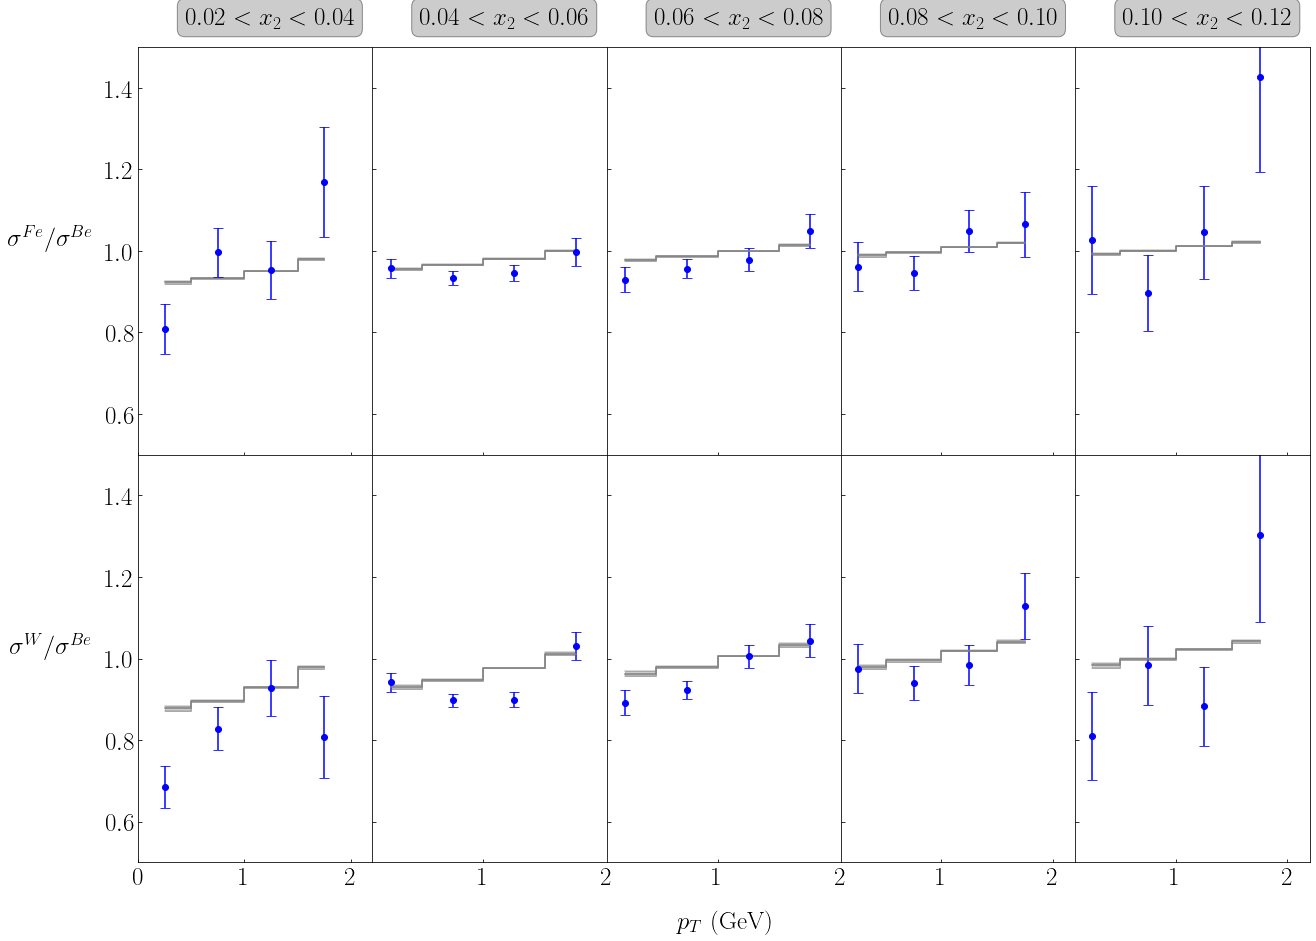

In [11]:
_color = 'blue'
fill_color = 'grey'

if E866 == 1:
    fig2, axs2 = plt.subplots(2, 5, sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0})

    filename = ['E866_800_FeBe.dat','E866_800_WBe.dat']

    plot_68percent(axs2, filename[0], fill_color, 0)
    plot_68percent(axs2, filename[1], fill_color, 1)

    path2dat = pwd+'/data_reps/data_rep_000/'
    df = [(pd.read_csv(path2dat + filename[0], sep ='\s+')),
          (pd.read_csv(path2dat + filename[1], sep ='\s+'))]

    plot_dydatafile(axs2, df[0], _color,fill_color, 0,  r"\rm E866 (800 GeV)",True)
    plot_dydatafile(axs2, df[1], _color,fill_color, 1,  r"\rm E866 (800 GeV)",True)

    # Axes Limits
    # Y axis
    axs2[0,0].set_ylim(0.5,1.5)
    axs2[1,0].set_ylim(0.5,1.5)
    # X axis
    axs2[1,0].set_xlim(0,2.2)
    axs2[1,1].set_xlim(0.1,2)
    axs2[1,2].set_xlim(0.1,2)
    axs2[1,3].set_xlim(0.1,2.2)
    axs2[1,4].set_xlim(0.1,2.2)

    # Set Labels
    axs2[0,0].set_ylabel(r"\rm $\sigma^{Fe}/\sigma^{Be}$", fontsize = 25,rotation = 0,labelpad = 55)
    axs2[1,0].set_ylabel(r"\rm $\sigma^{W}/\sigma^{Be}$", fontsize = 25,rotation = 0,labelpad = 55)
    axs2[1,2].set_xlabel(r"\rm $p_T $ (GeV)", fontsize = 25, labelpad = 20)

    # Set Figure Size
    fig2.set_size_inches(21,15)
    props = dict(boxstyle='round', facecolor='white', alpha=0)
    props2 = dict(boxstyle='round', facecolor='gray', alpha=0.4)

    axs2[0,0].text(0.2, 1.1,  r'\rm $0.02 < x_2 < 0.04$', transform=axs2[0,0].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs2[0,1].text(0.2, 1.1,  r'\rm $0.04 < x_2 < 0.06$', transform=axs2[0,1].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs2[0,2].text(0.2, 1.1,  r'\rm $0.06 < x_2 < 0.08$', transform=axs2[0,2].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs2[0,3].text(0.2, 1.1,  r'\rm $0.08 < x_2 < 0.10$', transform=axs2[0,3].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs2[0,4].text(0.2, 1.1,  r'\rm $0.10 < x_2 < 0.12$', transform=axs2[0,4].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)


    fig2.savefig('Drell-Yan_E866_x2bins.pdf', bbox_inches = "tight")



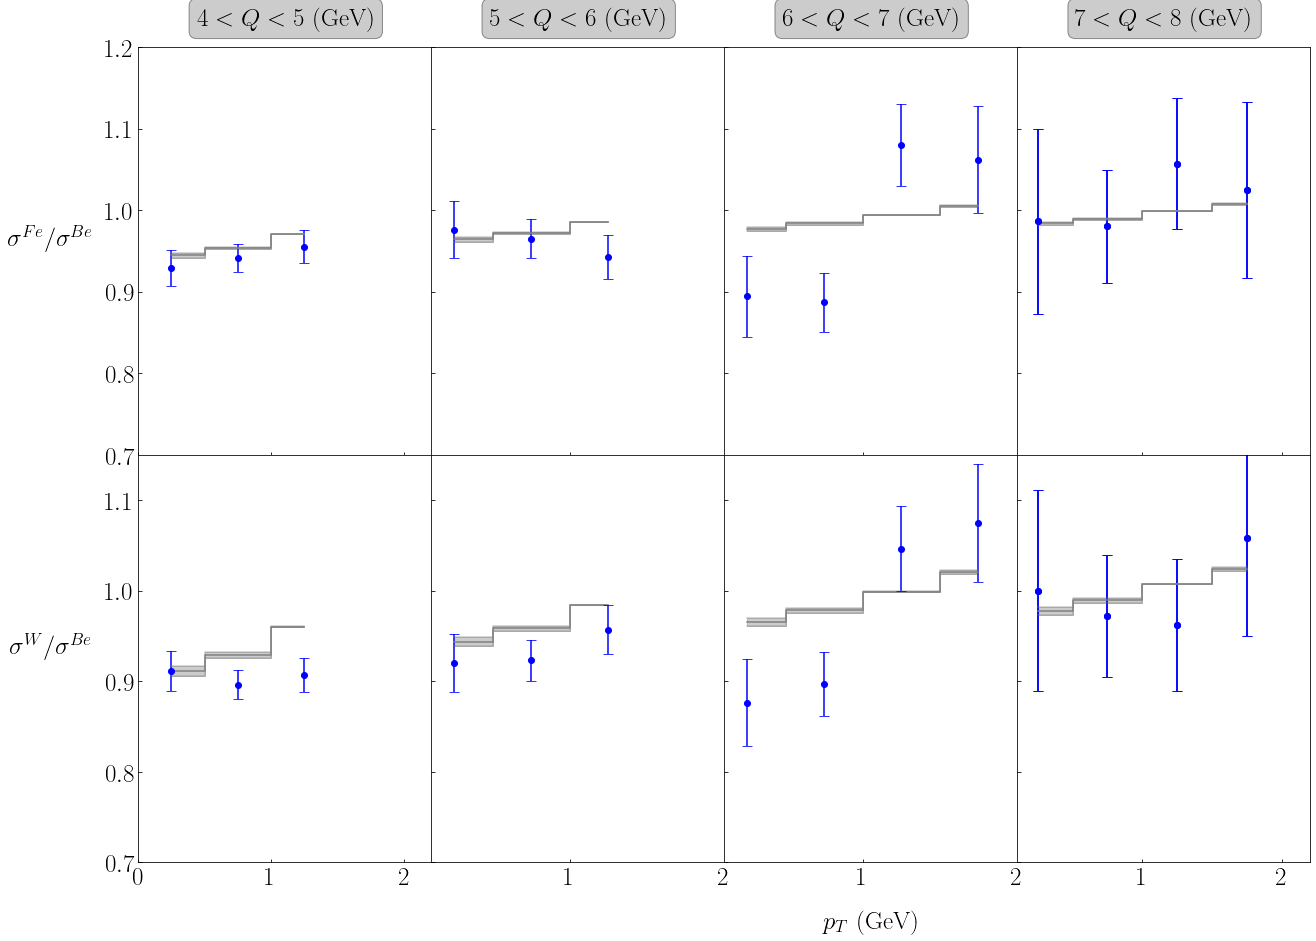

In [12]:
_color = 'blue'
fill_color = 'gray'

if E866 == 1:
    fig3, axs3 = plt.subplots(2, 4, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0})

    filename = ['E866_800_Qbin_FeBe.dat','E866_800_Qbin_WBe.dat']

    plot_68percent_Qbins(axs3, filename[0], fill_color, 0)
    plot_68percent_Qbins(axs3, filename[1], fill_color, 1)

    path2dat = pwd+'/data_reps/data_rep_000/'
    df = [(pd.read_csv(path2dat + filename[0], sep ='\s+')),
          (pd.read_csv(path2dat + filename[1], sep ='\s+'))]

    plot_dydatafile_Qbins(axs3, df[0], _color, fill_color, 0,  r"\rm E866 (800 GeV)",True)
    plot_dydatafile_Qbins(axs3, df[1], _color, fill_color, 1,  r"\rm E866 (800 GeV)",True)

    # Axes Limits
    # Y axis
    axs3[0,0].set_ylim(0.7,1.2)
    axs3[1,0].set_ylim(0.7,1.15)
    # X axis
    axs3[1,0].set_xlim(0,2.2)
    axs3[1,1].set_xlim(0.1,2)
    axs3[1,2].set_xlim(0.1,2)
    axs3[1,3].set_xlim(0.1,2.2)

    # Set Labels
    axs3[0,0].set_ylabel(r"\rm $\sigma^{Fe}/\sigma^{Be}$", fontsize = 25,rotation = 0,labelpad = 55)
    axs3[1,0].set_ylabel(r"\rm $\sigma^{W}/\sigma^{Be}$", fontsize = 25,rotation = 0,labelpad = 55)
    axs3[1,2].set_xlabel(r"\rm $p_T $ (GeV)", fontsize = 25, labelpad = 20)

    # Set Figure Size
    fig3.set_size_inches(21,15)
    props = dict(boxstyle='round', facecolor='white', alpha=0)
    props2 = dict(boxstyle='round', facecolor='gray', alpha=0.4)

    axs3[0,0].text(0.2, 1.1,  r'\rm $4 < Q < 5$ (GeV)', transform=axs3[0,0].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs3[0,1].text(0.2, 1.1,  r'\rm $5 < Q < 6$ (GeV)', transform=axs3[0,1].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs3[0,2].text(0.2, 1.1,  r'\rm $6 < Q < 7$ (GeV)', transform=axs3[0,2].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    axs3[0,3].text(0.2, 1.1,  r'\rm $7 < Q < 8$ (GeV)', transform=axs3[0,3].transAxes, fontsize=25, color = 'black',
    verticalalignment='top', bbox=props2)

    fig3.savefig('Drell-Yan_E866_Qbins.pdf', bbox_inches = "tight")


In [13]:
def plot_68percent_HERMES(axes, filename, clr, row, lbl):
    path2dat = pwd+'/data_reps/data_rep_000/HERMES/'
    nu  = filename + '_nu.dat'
    z   = filename + '_z.dat'
    Q2  = filename + '_q2.dat'
    pt2 = filename + '_pt2.dat'
    filenames = [nu,z,pt2]    
    for i in range(len(filenames)):
        if (filenames[i] != 'pip_kr_pt2.dat'):
            file = (pd.read_csv(path2dat + filenames[i], sep ='\s+'))
            maxx = maxlib[filenames[i]]
            minn = minlib[filenames[i]]
            ydata = file['MULT-RATIO']
            error = np.sqrt((file['STAT'])**2+ (file['SYS'])**2)
            if i == 0:
                xdata = file['Nu']
            if i == 1:
                xdata = file['Z']
            if i == 2:
                xdata = file['pt2']
            axes[row,i].tick_params(axis = 'both', direction ='in',labelsize = 30)
            axes[row,i].errorbar(xdata, ydata, error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False, label = lbl)
            axes[row,i].step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
            axes[row,i].step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
            axes[row,i].fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

In [14]:
def plot_68percent_HERMES2(axes, filename, clr, row, lbl):
    path2dat = pwd+'/data_reps/data_rep_000/HERMES/'
    nu  = filename + '_nu.dat'
    z   = filename + '_z.dat'
    Q2  = filename + '_q2.dat'
    pt2 = filename + '_pt2.dat'
    filenames = [nu,z,Q2,pt2]    
    for i in range(len(filenames)):
        if (filenames[i] != 'pip_kr_pt2.dat'):
            file = (pd.read_csv(path2dat + filenames[i], sep ='\s+'))
            maxx = maxlib[filenames[i]]
            minn = minlib[filenames[i]]
            ydata = file['MULT-RATIO']
            error = np.sqrt((file['STAT'])**2+ (file['SYS'])**2)
            if i == 0:
                xdata = file['Nu']
            if i == 1:
                xdata = file['Z']
            if i == 2:
                xdata = file['Q2']
            if i == 3:
                xdata = file['pt2']
            axes[row,i].tick_params(axis = 'both', direction ='in',labelsize = 30)
            axes[row,i].errorbar(xdata, ydata, error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False, label = lbl)
            axes[row,i].step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
            axes[row,i].step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
            axes[row,i].fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

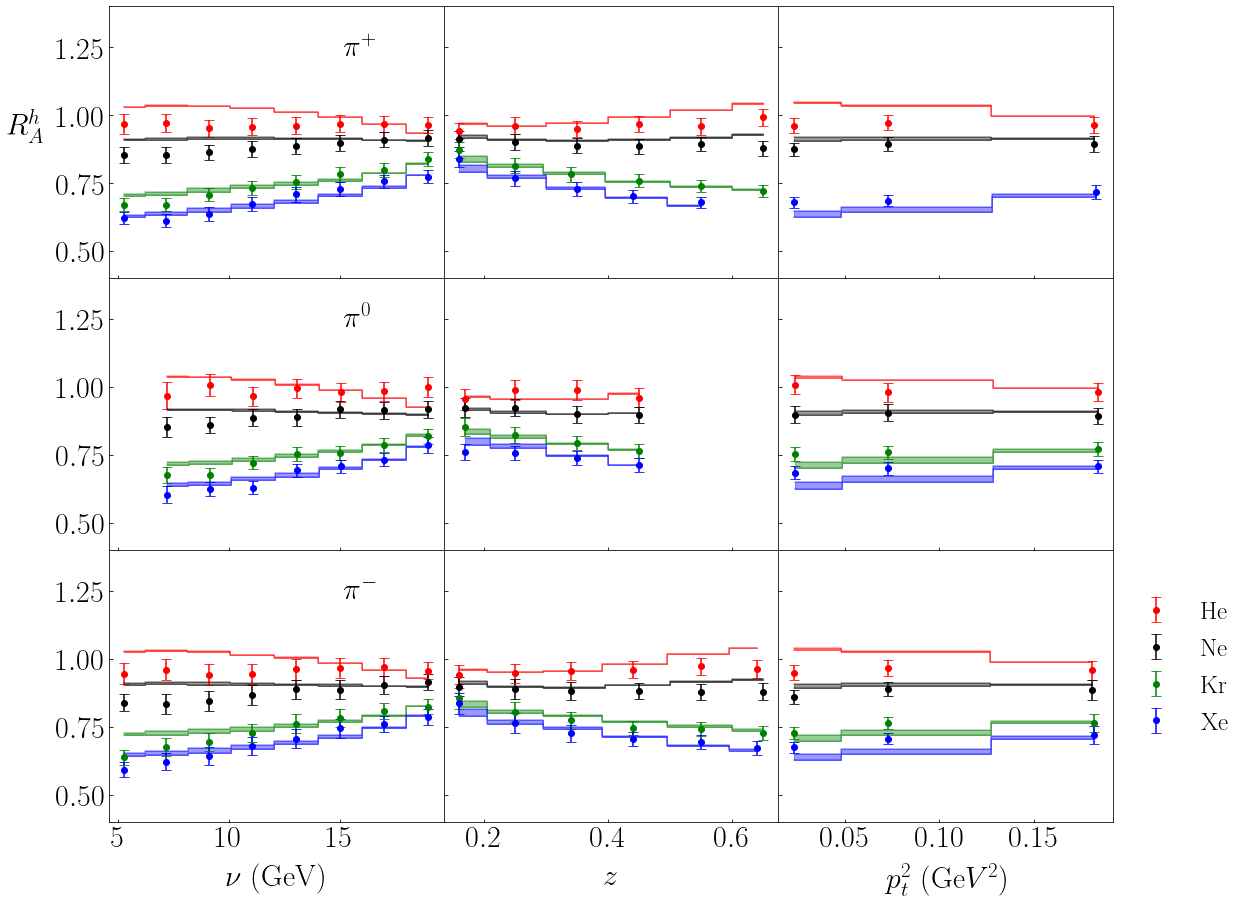

In [15]:
if HERMES == 1:
    fig4, axs4 = plt.subplots(3, 3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0})
    
    plot_68percent_HERMES(axs4, 'pip_he', 'red', 0, r'\rm He')
    plot_68percent_HERMES(axs4, 'pi0_he', 'red', 1, r'\rm He')
    plot_68percent_HERMES(axs4, 'pim_he', 'red', 2, r'\rm He')
    
    plot_68percent_HERMES(axs4, 'pip_ne', 'black', 0, r'\rm Ne')
    plot_68percent_HERMES(axs4, 'pi0_ne', 'black', 1, r'\rm Ne')
    plot_68percent_HERMES(axs4, 'pim_ne', 'black', 2, r'\rm Ne')
    
    plot_68percent_HERMES(axs4, 'pip_kr', 'green', 0, r'\rm Kr')
    plot_68percent_HERMES(axs4, 'pi0_kr', 'green', 1, r'\rm Kr')
    plot_68percent_HERMES(axs4, 'pim_kr', 'green', 2, r'\rm Kr')
    
    plot_68percent_HERMES(axs4, 'pip_xe', 'blue', 0, r'\rm Xe')
    plot_68percent_HERMES(axs4, 'pi0_xe', 'blue', 1, r'\rm Xe')
    plot_68percent_HERMES(axs4, 'pim_xe', 'blue', 2, r'\rm Xe')
    
    
    axs4[0,0].set_ylabel(r"\rm $R^h_A$", fontsize = 30,rotation = 0,labelpad = 30)
    axs4[2,0].set_xlabel(r"\rm $\nu$ (GeV)", fontsize = 30, labelpad = 10)
    axs4[2,1].set_xlabel(r"\rm $z$", fontsize = 30, labelpad = 10)
    #axs4[2,2].set_xlabel(r"\rm $Q^2$ (Ge$V^2$)", fontsize = 30, labelpad = 10)
    axs4[2,2].set_xlabel(r"\rm $p_t^2$ (Ge$V^2$)", fontsize = 30, labelpad = 10)
    
    # Axes Limits
    # Y axis
    axs4[0,0].set_ylim(0.4,1.4)
    axs4[1,0].set_ylim(0.4,1.4)
    axs4[2,0].set_ylim(0.4,1.4)

    fig4.set_size_inches(18,15)
    
    # Text Boxes ##
    props = dict(boxstyle='round', facecolor='white', alpha=0)

    axs4[0,0].text(0.7, 0.9,  r"\rm $\pi^+$", transform=axs4[0,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

    axs4[1,0].text(0.7, 0.9,  r"\rm $\pi^0$", transform=axs4[1,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

    axs4[2,0].text(0.7, 0.9,  r"\rm $\pi^-$", transform=axs4[2,0].transAxes, fontsize=30,
    verticalalignment='top', bbox=props)

    axs4[2,2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))
    
    fig4.savefig('SIDIS_HERMES_PIONS.pdf', bbox_inches = "tight")

In [16]:
def plot_68percent_JLAB(axes, filename):
    path2dat = pwd+'/data_reps/data_rep_000/'
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    ptlow      = file['ptlow']
    pthigh     = file['pthigh']
    R_C        = file['C']
    R_C_err    = file['Cerr']
    R_Fe       = file['Fe']
    R_Fe_err   = file['FEerr']
    R_Pb       = file['Pb']
    R_Pb_err   = file['PBerr']
    ptavg = []
    pterr_low = []
    pterr_high = []
    for i in range(len(ptlow)):
        ptavg.append(0.5*(ptlow[i]+pthigh[i]))
    axes.errorbar(ptavg, R_C,  yerr= R_C_err, fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm C")
    axes.errorbar(ptavg, R_Fe, yerr= R_Fe_err, fmt = "o",color = "blue", ecolor = "blue", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Fe")
    axes.errorbar(ptavg, R_Pb, yerr= R_Pb_err, fmt = "o",color = "black", ecolor = "black", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm Pb")
    maxx_C = maxlib[filename]['C']
    minn_C = minlib[filename]['C']
    axes.fill_between(ptavg,maxx_C,minn_C, step = 'mid',color = "red",alpha=0.4)
    maxx_Fe = maxlib[filename]['Fe']
    minn_Fe = minlib[filename]['Fe']
    axes.fill_between(ptavg,maxx_Fe,minn_Fe, step = 'mid',color = "blue",alpha=0.4)
    maxx_Pb = maxlib[filename]['Pb']
    minn_Pb = minlib[filename]['Pb']
    axes.fill_between(ptavg,maxx_Pb,minn_Pb, step = 'mid',color = "black",alpha=0.4)

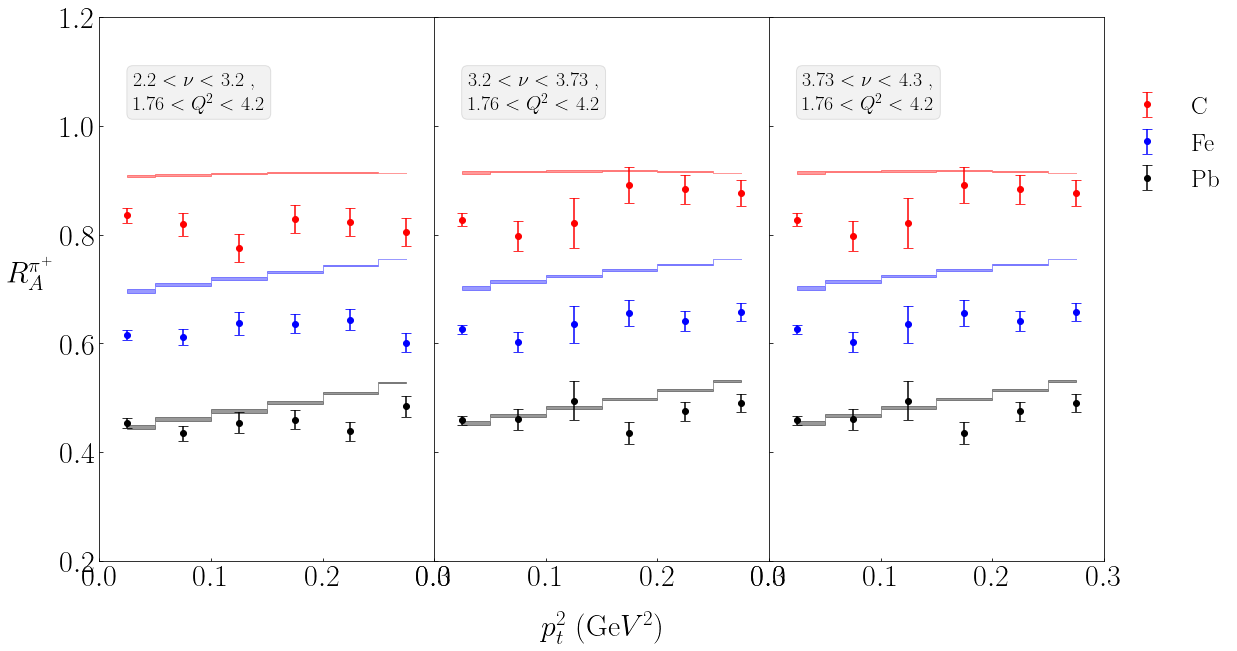

In [17]:
if JLAB == 1:
    fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',gridspec_kw={'hspace': 0, 'wspace': 0})
    
    plot_68percent_JLAB(axs[0], 'Clas_bin3.dat')
    plot_68percent_JLAB(axs[1], 'Clas_bin6.dat')
    plot_68percent_JLAB(axs[2], 'Clas_bin6.dat')
    
    
    
    axs[0].tick_params(axis = 'both', direction ='in',labelsize = 30)
    axs[1].tick_params(axis = 'both', direction ='in',labelsize = 30)
    axs[2].tick_params(axis = 'both', direction ='in',labelsize = 30)

    
    
    axs[0].set_ylabel(r"\rm $R^{\pi^+}_A$", fontsize = 30,rotation = 0,labelpad = 30)
    axs[1].set_xlabel(r"\rm $p_t^2 $ (Ge$V^2$)", fontsize = 30,rotation = 0,labelpad = 20)
    axs[2].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.2, 0.9))
    axs[0].set_ylim(0.2,1.2)
    
    
    props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    
    nustr = r"\rm 2.2 $ < \nu < $ 3.2"
    Q2str = r"\rm 1.76 $ < Q^2 < $ 4.2 "
    axs[0].text(0.10, 0.9, nustr + " , " + "\n" + Q2str , transform=axs[0].transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
    
    
    nustr = r"\rm 3.2 $ < \nu < $ 3.73"
    Q2str = r"\rm 1.76 $ < Q^2 < $ 4.2 "
    axs[1].text(0.10, 0.9, nustr + " , " + "\n" + Q2str , transform=axs[1].transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
    
    nustr = r"\rm 3.73 $ < \nu < $ 4.3"
    Q2str = r"\rm 1.76 $ < Q^2 < $ 4.2 "
    axs[2].text(0.10, 0.9, nustr + " , " + "\n" + Q2str , transform=axs[2].transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
    

    fig.set_size_inches(18,10)
    # In[12]:

    axs[0].set_xlim(0,0.3)
    axs[1].set_xlim(0,0.3)
    axs[2].set_xlim(0,0.3)
    
    py.savefig('JLAB.pdf',bbox_inches="tight")



In [18]:
def DY_band(axes, filename,clr, lbl):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = maxlib[filename]
        minn = minlib[filename]
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['CX']
        error = file['ERR']
        
        axes.tick_params(axis = 'both', direction ='in',labelsize = 20)
        axes.errorbar(xdata, ydata, error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False, label = lbl)
        axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

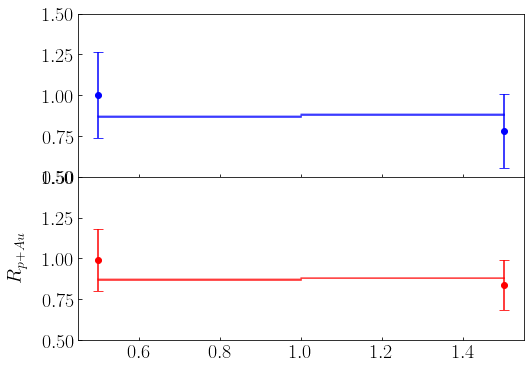

In [19]:
if RHIC == 1:
    fig5, axs5 = plt.subplots(2, 1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
    filename_Augoing = "RHIC_Ratio_pAu1.dat"
    filename_pgoing = "RHIC_Ratio_pAu2.dat"
    
    DY_band(axs5[0], filename_Augoing, "blue", "Au going")
    DY_band(axs5[1], filename_pgoing, "red", "p going")

    axs5[0].set_ylim(0.5,1.5)
    axs5[1].set_ylim(0.5,1.5)
    
    
    axs5[0].set_xlabel(r"\rm $p_{T_{\mu\mu}} $ [GeV/c]", fontsize = 20,rotation = 0,labelpad = 15)
    axs5[1].set_ylabel(r"\rm $R_{p+Au}$", fontsize = 20,rotation = 90,labelpad = 15)

    fig5.set_size_inches(8,6)
    fig5.savefig('RHIC.pdf', bbox_inches = "tight")

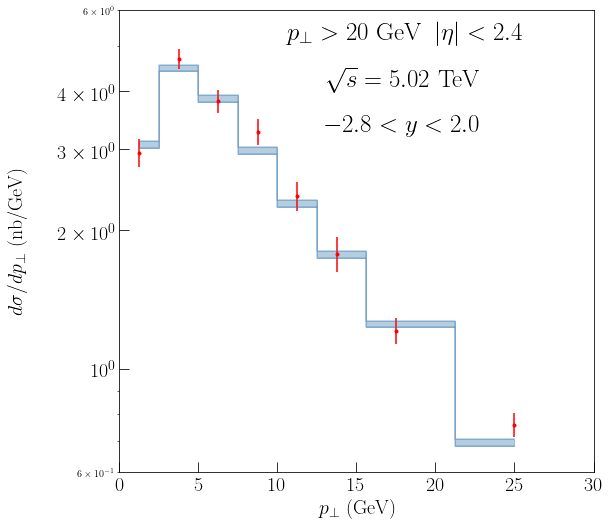

In [27]:
if CMS5 == 1:
    nrows = 1
    ncols = 1
    sizeOfFont = 20
    fig6 = py.figure(figsize=(ncols*7+1.5,nrows*7+1.5))
    ax6 = py.subplot(111)
    
    filename = "CMS5.dat"
    clr = "SteelBlue"
    lbl = ""
    
    
    path2dat = pwd+'/data_reps/data_rep_000/'
        
    maxx = []
    minn = []
        
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)
        
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
        
    ax6.tick_params(axis = 'both', direction ='in',labelsize = 20)
    ax6.errorbar(xdata, ydata/1000., error/1000., fmt = "r.",color = "red", ecolor = "red", label = lbl)
    ax6.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    ax6.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    ax6.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)
    
    
    ax6.set_xlim(0,30)
    #ax6.set_ylim(0,10)
    ax6.tick_params(axis="both",direction="in", length=10, labelsize= sizeOfFont)


    ax6.set_ylabel(r'\rm $d\sigma/d p_\perp$ (nb/GeV)',labelpad = 30,fontsize=sizeOfFont)
    ax6.set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    ax6.semilogy()
    ax6.set_ylim(0.6,6)
    
    
    ax6.text(0.60,0.75, r'\rm $-2.8<y<2.0$'                     ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax6.transAxes)
    ax6.text(0.60,0.85, r'\rm $\sqrt{s} = 5.02$ TeV'            ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax6.transAxes)
    ax6.text(0.60,0.95, r'\rm $p_\perp>20$ GeV$\,$ $|\eta|<2.4$',fontsize = 25, horizontalalignment='center',verticalalignment='center', transform=ax6.transAxes)
    
    ax6.set_yticks([1,2,3,4])
    ax6.set_yticklabels([
    "$10^{0}$", r"\rm $ 2 \times 10^{0}$", r"\rm $ 3 \times 10^{0}$", r"\rm $ 4 \times 10^{0}$"])


    

    

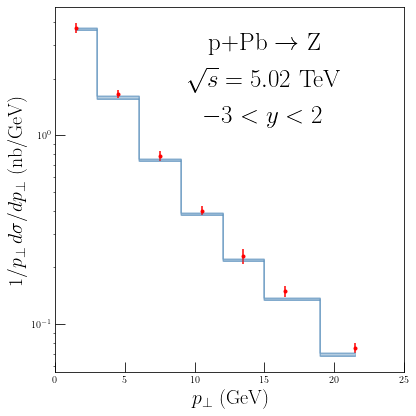

In [22]:
if ATLAS == 1:
    # Plot
    nrows = 1
    ncols = 1
    fig = py.figure(figsize=(ncols*4+1.5,nrows*4+1.5))
    
    filename = "ATLAS5_Y1.dat"
    clr = "SteelBlue"
    lbl = ""
    
    path2dat = pwd+'/data_reps/data_rep_000/'
        
    maxx = []
    minn = []
        
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)
        
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    
    ax = py.subplot(111)

    ax.errorbar(xdata, ydata/1000., error/1000.,fmt = "r.")
    #ax.plot(df.pt, df.FUU/1000.)
    ax.set_xlim(0,25)
    ax.tick_params(axis="both",direction="in", length=10)
    ax.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    ax.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    ax.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)


    ax.set_ylabel(r'\rm $1/p_\perp\,d\sigma/d p_\perp$ (nb/GeV)',fontsize=sizeOfFont)
    ax.set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    ax.semilogy()
    ax.text(0.60,0.9, r'\rm p+Pb $\rightarrow$ Z'  ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.8, r'\rm $\sqrt{s} = 5.02$ TeV' ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.7, r'\rm $-3<y<2$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    py.tight_layout(pad=-0.3)
    py.savefig('ATLAS5_Y1.pdf',bbox_inches="tight")

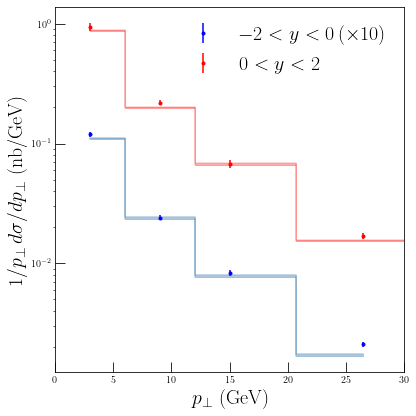

In [214]:
if ATLAS == 1:
    # Plot
    nrows = 1
    ncols = 1
    fig = py.figure(figsize=(ncols*4+1.5,nrows*4+1.5))
    
    filename = "ATLAS5_Y2.dat"
    clr = "SteelBlue"
    clr2 = "red"
    lbl = ""
    filename2 = "ATLAS5_Y3.dat"
    
    path2dat = pwd+'/data_reps/data_rep_000/'
        
    maxx = []
    minn = []
    
    maxx2 = []
    minn2 = []
        
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/10000.)
            minn.append(minlib[filename][i]/10000.)
            
    for i in range(len(maxlib[filename2])):
            maxx2.append(maxlib[filename2][i]/1000.)
            minn2.append(minlib[filename2][i]/1000.)        
        
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    
    file2 = (pd.read_csv(path2dat + filename2, sep ='\s+'))
    xdata2 = file2['pt']
    ydata2 = file2['CX']
    error2 = file2['ERR']
    
    ax = py.subplot(111)

    ax.errorbar(xdata, ydata/10000.,error/10000.,fmt = "b.",label = r"\rm $-2<y<0\, (\times 10)$")
    ax.errorbar(xdata2, ydata2/1000. ,error2/1000. ,fmt = "r.",label = r"\rm $0<y<2$")
    ax.set_xlim(0,30)
    ax.tick_params(axis="both",direction="in", length=10)
    ax.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    ax.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    ax.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.2)
    ax.step(xdata2,maxx2, where = 'mid',color = clr2,alpha=0.2)
    ax.step(xdata2,minn2, where = 'mid',color = clr2,alpha=0.2)
    ax.fill_between(xdata2,maxx2,minn2, step = 'mid',color = clr2,alpha=0.2)



    ax.set_ylabel(r'\rm $1/p_\perp\,d\sigma/d p_\perp$ (nb/GeV)',fontsize=sizeOfFont)
    ax.set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    ax.semilogy()


    ax.legend(frameon = False,fontsize = sizeOfFont,loc = 1)

    py.tight_layout(pad=-0.3)
    py.savefig('ATLAS5_Y23.pdf',bbox_inches="tight")


In [24]:
def DY_band2(axes, filename,clr, lbl):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = maxlib[filename]
        minn = minlib[filename]
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['DY-RATIO']
        error = file['error']
        
        axes.tick_params(axis = 'both', direction ='in',labelsize = 25)
        axes.errorbar(xdata, ydata, error, fmt = "r.")
        axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

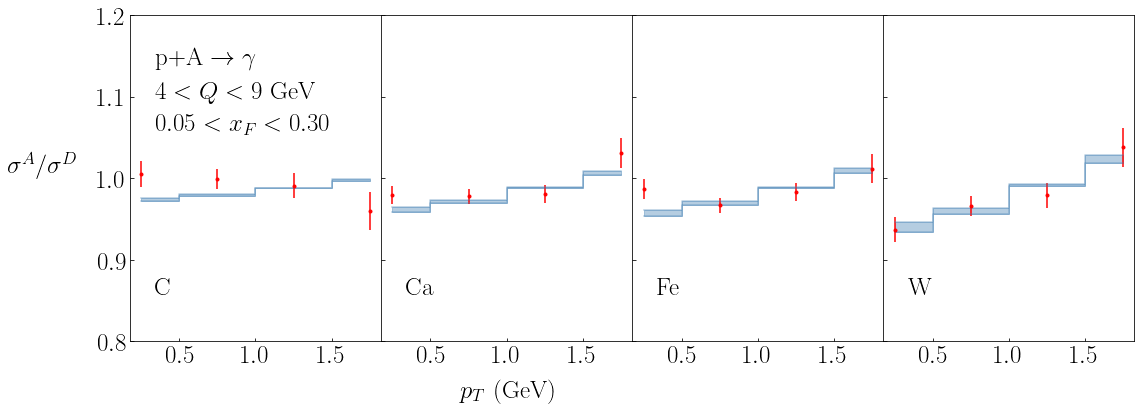

In [25]:
if E772 == 1:
    # Plot
    fig, axs = plt.subplots(1, 4, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
    CD = 'E772_800_CD.dat'
    CaD = 'E772_800_CaD.dat'
    FeD = 'E772_800_FeD.dat'
    WD = 'E772_800_WD.dat'
    
    clr = "SteelBlue"
    FONT_SIZE = 25
    
    DY_band2(axs[0], CD, clr, "")
    DY_band2(axs[1], CaD, clr, "")
    DY_band2(axs[2], FeD, clr, "")
    DY_band2(axs[3], WD, clr, "")

    
    axs[0].set_ylim(0.8,1.2)
    
    
    #Set Axes Labels
    axs[0].set_ylabel(r"\rm $\sigma^{A}/\sigma^{D}$", fontsize = FONT_SIZE,rotation = 0,labelpad = 55)
    axs[1].set_xlabel(r"\rm $p_T $ (GeV)", fontsize = FONT_SIZE, labelpad = 10)

    
    fig.set_size_inches(10,10)
    props = dict(boxstyle='round', facecolor='white', alpha=0)

    axs[0].text(0.1, 0.2,  r"\rm C", transform=axs[0].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props)
    
    axs[0].text(0.1, 0.9,  r"\rm p+A $\to \gamma$", transform=axs[0].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props)
    axs[0].text(0.1, 0.8,  r"\rm $4 < Q < 9$ GeV", transform=axs[0].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props)
    axs[0].text(0.1, 0.7,  r"\rm $0.05 < x_F < 0.30$", transform=axs[0].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props)

    axs[1].text(0.1, 0.2,  r"\rm Ca", transform=axs[1].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props) 
            
    axs[2].text(0.1, 0.2,  r"\rm Fe", transform=axs[2].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props) 

    axs[3].text(0.1, 0.2,  r"\rm W", transform=axs[3].transAxes, fontsize=FONT_SIZE, color = 'black',
    verticalalignment='top', bbox=props) 

    fig.set_size_inches(18,6)
    
    py.savefig('E772.pdf',bbox_inches="tight")

In [26]:
def DY_band3(axes, filename,clr, lbl):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = maxlib[filename]
        minn = minlib[filename]
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['RA']
        error = file['ERR']
        
        axes.tick_params(axis = 'both', direction ='in',labelsize = 25)
        axes.errorbar(xdata, ydata, error, fmt = "r.")
        axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

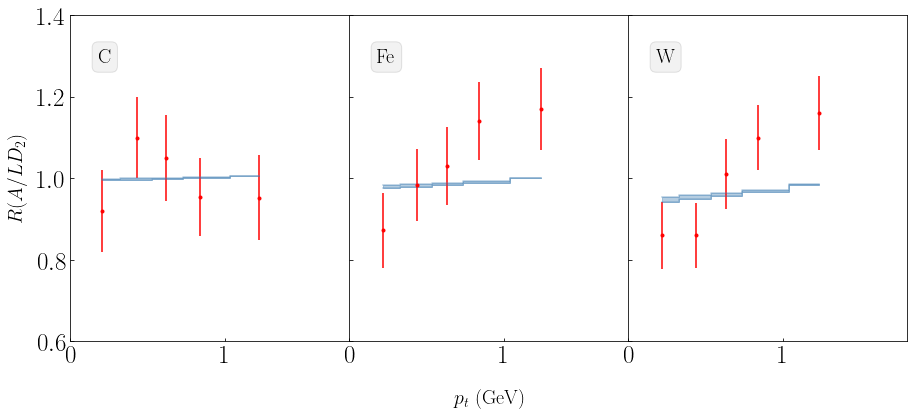

In [27]:
if E906 == 1:
    fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
    CD = 'E906_C.dat'
    FeD = 'E906_FE.dat'
    WD = 'E906_W.dat'
    
    clr = "SteelBlue"
    FONT_SIZE = 25
    
    DY_band3(axs[0], CD, clr, "")
    DY_band3(axs[1], FeD, clr, "")
    DY_band3(axs[2], WD, clr, "")
    
    
    axs[0].tick_params(axis = 'both', direction ='in',labelsize = 25)
    axs[1].tick_params(axis = 'both', direction ='in',labelsize = 25)
    axs[2].tick_params(axis = 'both', direction ='in',labelsize = 25)

    axs[0].set_xlim(0,1.8)
    axs[1].set_xlim(0,1.8)
    axs[2].set_xlim(0,1.8)

    axs[0].set_ylim(0.6,1.4)
    #axs[1].set_ylim(0.2,1.2)
    #axs[1].set_ylim(0.2,1.2)
    props = dict(boxstyle='round', facecolor='gray', alpha=0.1)
    axs[0].text(0.10, 0.9, r"\rm C" , transform=axs[0].transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
    axs[1].text(0.10, 0.9, r"\rm Fe" , transform=axs[1].transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
    axs[2].text(0.10, 0.9, r"\rm W" , transform=axs[2].transAxes, fontsize=20,
    verticalalignment='top', bbox=props)
    
    
    axs[0].set_ylabel(r"\rm $R(A/LD_2)$", fontsize = 20,rotation = 90,labelpad = 10)
    axs[1].set_xlabel(r"\rm $p_t $ (GeV)", fontsize = 20,rotation = 0,labelpad = 20)

    fig.set_size_inches(15,6)
    
    fig.savefig('E906.pdf', bbox_inches = "tight")



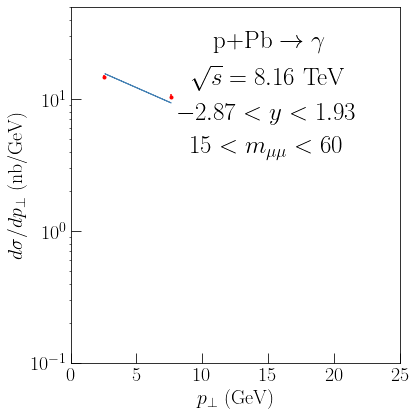

In [28]:
if CMS8 == 1:
    # Plot
    nrows = 1
    ncols = 1
    fig = py.figure(figsize=(ncols*4+1.5,nrows*4+1.5))

    ax = py.subplot(111)
    
    filename = "CMS8_DY_no.dat"
    
    clr = "SteelBlue"
    lbl = "" 
    sizeOfFont = 20
    path2dat = pwd+'/data_reps/data_rep_000/'
        
    maxx = []
    minn = []
        
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)
            
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    

    ax.errorbar(xdata, ydata/1000.,error/1000.,fmt = "r.")
    ax.set_xlim(0,25)
    #ax.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    #ax.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    ax.fill_between(xdata,maxx,minn,color = clr,alpha=1)
    ax.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)


    ax.set_ylabel(r'\rm $d\sigma/d p_\perp$ (nb/GeV)',fontsize=sizeOfFont)
    ax.set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    ax.semilogy()
    ax.text(0.60,0.9, r'\rm p+Pb $\rightarrow \gamma$ '  ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.8, r'\rm $\sqrt{s} = 8.16$ TeV' ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.7, r'\rm $-2.87<y<1.93$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.6, r'\rm $15<m_{\mu\mu}<60$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.set_ylim(1e-1,50)

    py.tight_layout(pad=-0.3)
    py.savefig('CMS8_DY_no.pdf',bbox_inches="tight")


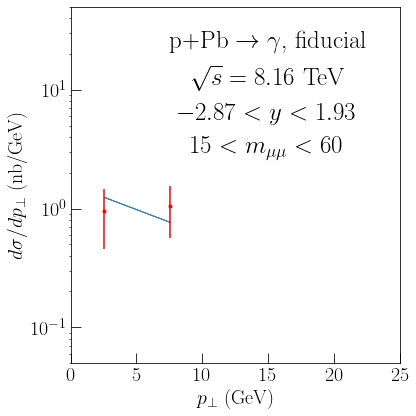

In [29]:
if CMS8 == 1:
    #Plot
    nrows = 1
    ncols = 1
    fig = py.figure(figsize=(ncols*4+1.5,nrows*4+1.5))

    ax = py.subplot(111)
    
    filename = "CMS8_DY_fid.dat"
    
    clr = "SteelBlue"
    lbl = "" 
    sizeOfFont = 20
    path2dat = pwd+'/data_reps/data_rep_000/'
        
    maxx = []
    minn = []
        
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)
            
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    

    ax.errorbar(xdata, ydata/1000.,error/1000.,fmt = "r.")
    ax.set_xlim(0,25)
    #ax.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    #ax.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    ax.fill_between(xdata,maxx,minn,color = clr,alpha=1)
    ax.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)


    ax.set_ylabel(r'\rm $d\sigma/d p_\perp$ (nb/GeV)',fontsize=sizeOfFont)
    ax.set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    ax.semilogy()
    ax.text(0.60,0.9, r'\rm p+Pb $\rightarrow \gamma$, fiducial'  ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.8, r'\rm $\sqrt{s} = 8.16$ TeV' ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.7, r'\rm $-2.87<y<1.93$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.6, r'\rm $15<m_{\mu\mu}<60$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.set_ylim(5e-2,50)

    py.tight_layout(pad=-0.3)
    py.savefig('CMS8_DY_fid.pdf',bbox_inches="tight")

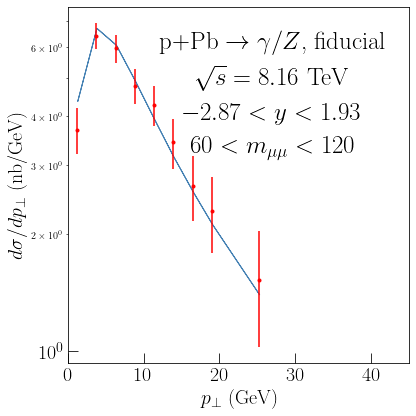

In [30]:
if CMS8 == 1:
    #Plot
    nrows = 1
    ncols = 1
    fig = py.figure(figsize=(ncols*4+1.5,nrows*4+1.5))

    ax = py.subplot(111)
    
    filename = "CMS8_ZZ_fid.dat"
    
    clr = "SteelBlue"
    lbl = "" 
    sizeOfFont = 20
    path2dat = pwd+'/data_reps/data_rep_000/'
        
    maxx = []
    minn = []
        
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)
            
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    

    ax.errorbar(xdata, ydata/1000.,error/1000.,fmt = "r.")
    ax.set_xlim(0,25)
    #ax.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
    #ax.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
    ax.fill_between(xdata,maxx,minn,color = clr,alpha=1)
    ax.tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)


    ax.set_ylabel(r'\rm $d\sigma/d p_\perp$ (nb/GeV)',fontsize=sizeOfFont)
    ax.set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    ax.semilogy()
    ax.text(0.60,0.9, r'\rm p+Pb $\rightarrow \gamma/Z$, fiducial'  ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.8, r'\rm $\sqrt{s} = 8.16$ TeV' ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.7, r'\rm $-2.87<y<1.93$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(0.60,0.6, r'\rm $60<m_{\mu\mu}<120$'              ,fontsize = 25,horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)

    ax.set_xlim(0,45)

    py.tight_layout(pad=-0.3)
    py.savefig('CMS8_ZZ_fid.pdf',bbox_inches="tight")

In [135]:
def plot_68percent_Qbins2(axes, filename, clr):
    path2dat = pwd+'/data_reps/data_rep_000/'
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))

    maxx = maxlib[filename]
    minn = minlib[filename]

    Qbin1 = dydata(file, 0,3)
    Qbin2 = dydata(file, 3,6)
    Qbin3 = dydata(file, 6,10)
    Qbin4 = dydata(file, 10,14)

    maxx1 = np.array(maxx[0:3])
    maxx2 = np.array(maxx[3:6])
    maxx3 = np.array(maxx[6:10])
    maxx4 = np.array(maxx[10:14])

    minn1 = np.array(minn[0:3])
    minn2 = np.array(minn[3:6])
    minn3 = np.array(minn[6:10])
    minn4 = np.array(minn[10:14])
    
    
    axes.step(Qbin1.xdata,1.2*maxx1, where = 'mid',color = 'cyan',alpha=0.4)
    axes.step(Qbin2.xdata,1.4*maxx2, where = 'mid',color = 'blue',alpha=0.4)
    axes.step(Qbin3.xdata,1.6*maxx3, where = 'mid',color = 'grey',alpha=0.4)
    axes.step(Qbin4.xdata,1.8*maxx4, where = 'mid',color = 'black',alpha=0.4)

    axes.step(Qbin1.xdata,1.2*minn1, where = 'mid',color = 'cyan',alpha=0.4)
    axes.step(Qbin2.xdata,1.4*minn2, where = 'mid',color = 'blue',alpha=0.4)
    axes.step(Qbin3.xdata,1.6*minn3, where = 'mid',color = 'grey',alpha=0.4)
    axes.step(Qbin4.xdata,1.8*minn4, where = 'mid',color = 'black',alpha=0.4)
    

    axes.fill_between(Qbin1.xdata,1.2*maxx1,1.2*minn1, step = 'mid',color = 'c0',alpha=0.4)
    axes.fill_between(Qbin2.xdata,1.4*maxx2,1.4*minn2, step = 'mid',color = 'blue',alpha=0.4)
    axes.fill_between(Qbin3.xdata,1.6*maxx3,1.6*minn3, step = 'mid',color = 'grey',alpha=0.4)
    axes.fill_between(Qbin4.xdata,1.8*maxx4,1.8*minn4, step = 'mid',color = 'black',alpha=0.4)
    
def plot_dydatafile_Qbins(axes, file, clr, clr2, row, lbl, isMain):
    Qbin1 = dydata(file, 0,3)
    Qbin2 = dydata(file, 3,6)
    Qbin3 = dydata(file, 6,10)
    Qbin4 = dydata(file, 10,14)

    if (isMain == True):
        dyplot(axes,Qbin1, clr2)
        dyplot(axes,Qbin2, clr2)
        dyplot(axes,Qbin3, clr2)
        dyplot(axes,Qbin4, clr2)

        dyplot_datapts(axes[row,0],Qbin1, clr)
        dyplot_datapts(axes[row,1],Qbin2, clr)
        dyplot_datapts(axes[row,2],Qbin3, clr)
        dyplot_datapts(axes[row,3],Qbin4, clr)
        dyplot_datapts_label(axes[row,3],Qbin4,clr, lbl)
    else:
        dy_interpolate(axes[row,0],Qbin1, clr2)
        dy_interpolate(axes[row,1],Qbin2, clr2)
        dy_interpolate(axes[row,2],Qbin3, clr2)
        dy_interpolate(axes[row,3],Qbin4, clr2)

In [73]:
def HERMES(axes, filename, clr, row, kinematics, lbl):
    path2dat = pwd+'/data_reps/data_rep_000/HERMES/'
    if(kinematics == 'Nu'):
        filenames = filename + '_nu.dat'
    elif(kinematics == 'Z'):
        filenames = filename + '_z.dat'
    elif(kinematics == 'q2'):
        filenames = filename + '_q2.dat'
    elif(kinematics == 'pt2'):
        filenames = filename + '_qpt2.dat'
    if (filename != 'pip_kr_pt2.dat'):
            file = (pd.read_csv(path2dat + filenames, sep ='\s+'))
            maxx = maxlib[filenames]
            minn = minlib[filenames]
            ydata = file['MULT-RATIO']
            error = np.sqrt((file['STAT'])**2+ (file['SYS'])**2)
            xdata = file[kinematics]
            axes.errorbar(xdata, ydata, error, fmt = "o",color = clr,label = lbl)
            axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
            axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
            axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

In [134]:
def E772(axes, filename,clr, lbl):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = maxlib[filename]
        minn = minlib[filename]
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['DY-RATIO']
        error = file['error']
        
        axes.errorbar(xdata, ydata, error, fmt = "o",color = clr, label = lbl)
        axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

In [146]:
def E866(axes, filename, clr,lbl,factor,bin):
    path2dat = pwd+'/data_reps/data_rep_000/'
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))

    maxx = maxlib[filename]
    minn = minlib[filename]
    
    xbin1 = file['pt'][0:3]
    xbin2 = file['pt'][3:6]
    xbin3 = file['pt'][6:10]
    xbin4 = file['pt'][10:14]
    
    ybin1 = file['DY-RATIO'][0:3]
    ybin2 = file['DY-RATIO'][3:6]
    ybin3 = file['DY-RATIO'][6:10]
    ybin4 = file['DY-RATIO'][10:14]
    
    error1 = file['error'][0:3]
    error2 = file['error'][3:6]
    error3 = file['error'][6:10]
    error4 = file['error'][10:14]

    maxx1 = np.array(maxx[0:3])
    maxx2 = np.array(maxx[3:6])
    maxx3 = np.array(maxx[6:10])
    maxx4 = np.array(maxx[10:14])

    minn1 = np.array(minn[0:3])
    minn2 = np.array(minn[3:6])
    minn3 = np.array(minn[6:10])
    minn4 = np.array(minn[10:14])
    
    if(bin == 1):
        xbin = xbin1
        ybin = factor*ybin1
        error = error1
        maxxx = factor*maxx1
        minnn = factor*minn1
    elif(bin == 2):
        xbin = xbin2
        ybin = factor*ybin2
        error = error2
        maxxx = factor*maxx2
        minnn = factor*minn2
    elif(bin == 3):
        xbin = xbin3
        ybin = factor*ybin3
        error = error3
        maxxx = factor*maxx3
        minnn = factor*minn3
    elif(bin == 4):
        xbin = xbin4
        ybin = factor*ybin4
        error = error4
        maxxx = factor*maxx4
        minnn = factor*minn4
    axes.errorbar(xbin, ybin, error, fmt = "o",color = clr,label = lbl)
    axes.step(xbin,maxxx, where = 'mid',color = clr,alpha=0.4)
    axes.step(xbin,minnn, where = 'mid',color = clr,alpha=0.4)
    axes.fill_between(xbin,maxxx,minnn, step = 'mid',color = clr,alpha=0.4)

In [147]:
def ATLAS5(axes,filename_bin,clr):    
    filename = "ATLAS5_Y2.dat"
    filename2 = "ATLAS5_Y3.dat"
    path2dat = pwd+'/data_reps/data_rep_000/'
    maxx = []
    minn = []
    maxx2 = []
    minn2 = []
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/10000.)
            minn.append(minlib[filename][i]/10000.)
            
    for i in range(len(maxlib[filename2])):
            maxx2.append(maxlib[filename2][i]/1000.)
            minn2.append(minlib[filename2][i]/1000.)        
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    file2 = (pd.read_csv(path2dat + filename2, sep ='\s+'))
    xdata2 = file2['pt']
    ydata2 = file2['CX']
    error2 = file2['ERR']
    if(filename_bin == "ATLAS5_Y2.dat"):
        axes.errorbar(xdata, ydata/10000.,error/10000.,fmt = "b.",label = r"\rm $-2<y<0\, (\times 10)$")
        axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.2)
    elif(filename_bin == "ATLAS5_Y3.dat"):
        axes.errorbar(xdata2, ydata2/1000. ,error2/1000. ,fmt = "r.",label = r"\rm $0<y<2$")
        axes.step(xdata2,maxx2, where = 'mid',color = clr,alpha=0.2)
        axes.step(xdata2,minn2, where = 'mid',color = clr,alpha=0.2)
        axes.fill_between(xdata2,maxx2,minn2, step = 'mid',color = clr,alpha=0.2)
    axes.semilogy()

In [148]:
def CMS5(axes,filename,clr):   
    path2dat = pwd+'/data_reps/data_rep_000/'   
    maxx = []
    minn = []
    for i in range(len(maxlib[filename])):
            maxx.append(maxlib[filename][i]/1000.)
            minn.append(minlib[filename][i]/1000.)
    file = (pd.read_csv(path2dat + filename, sep ='\s+'))
    xdata = file['pt']
    ydata = file['CX']
    error = file['ERR']
    
    axes.errorbar(xdata, ydata/1000./xdata, error/1000./xdata, fmt = "r.",color = "red", ecolor = "red", label = lbl)
    axes.step(xdata,maxx/xdata, where = 'mid',color = clr,alpha=0.4)
    axes.step(xdata,minn/xdata, where = 'mid',color = clr,alpha=0.4)
    axes.fill_between(xdata,maxx/xdata,minn/xdata, step = 'mid',color = clr,alpha=0.4)
    axes.semilogy()


In [149]:
def RHIC(axes, filename,clr, lbl):
        path2dat = pwd+'/data_reps/data_rep_000/'
        
        maxx = maxlib[filename]
        minn = minlib[filename]
        
        file = (pd.read_csv(path2dat + filename, sep ='\s+'))
        xdata = file['pt']
        ydata = file['CX']
        error = file['ERR']
        
        axes.errorbar(xdata, ydata, error, fmt = "o",color= clr, label = lbl)
        axes.step(xdata,maxx, where = 'mid',color = clr,alpha=0.4)
        axes.step(xdata,minn, where = 'mid',color = clr,alpha=0.4)
        axes.fill_between(xdata,maxx,minn, step = 'mid',color = clr,alpha=0.4)

In [150]:
FULLPLOT =1

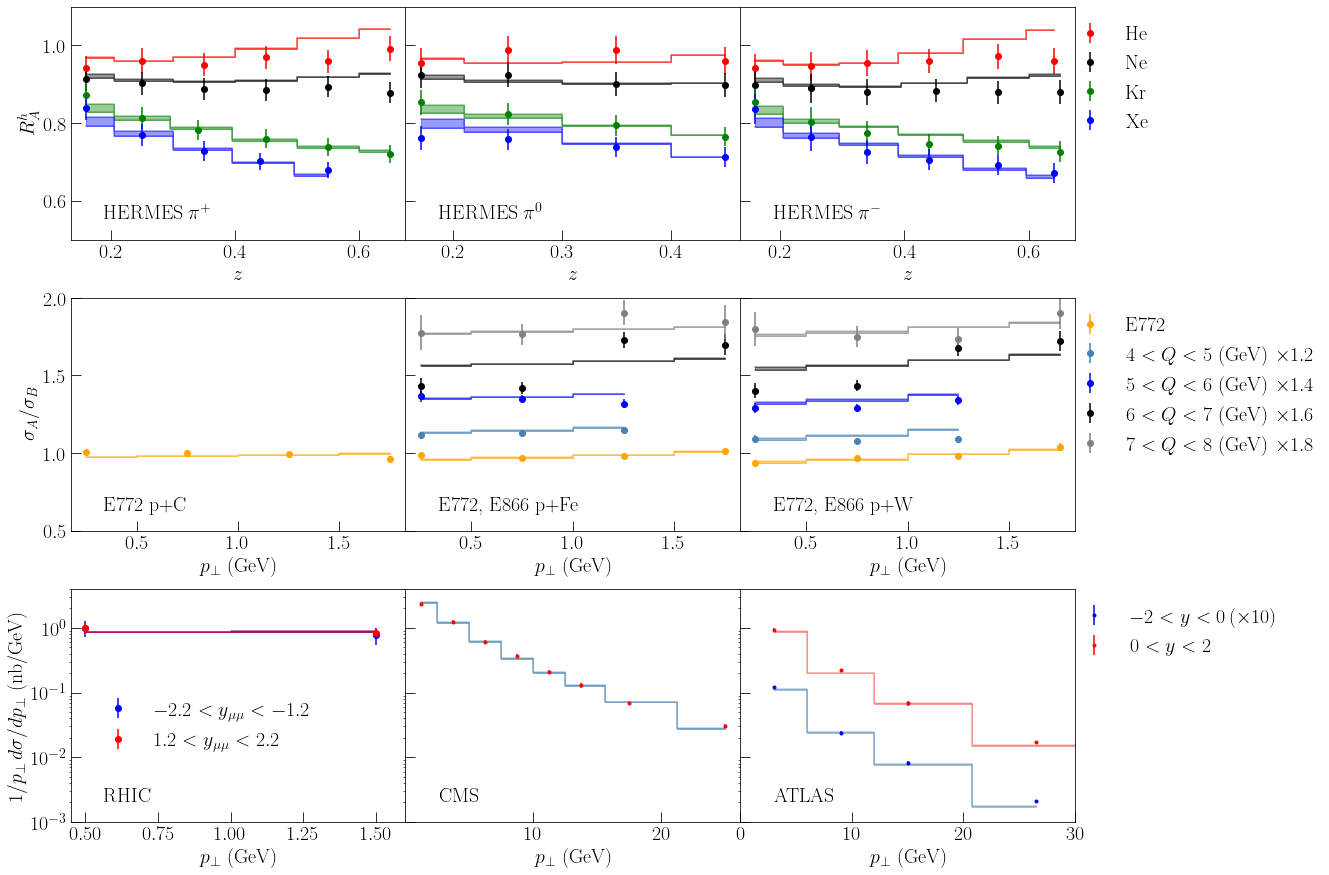

In [168]:
if FULLPLOT == 1:
    fig, axs = plt.subplots(3, 3, sharex=False, sharey='row',gridspec_kw={'hspace': 0.25, 'wspace': 0}) 
    
    sizeofFont = 30
    
    ### ROW 1 : HERMES (SIDIS)
    HERMES(axs[0,0], 'pip_he', 'red', 0, 'Z', r'\rm He')
    HERMES(axs[0,0], 'pip_ne', 'black', 0, 'Z', r'\rm Ne')
    HERMES(axs[0,0], 'pip_kr', 'green', 0, 'Z', r'\rm Kr')
    HERMES(axs[0,0], 'pip_xe', 'blue', 0, 'Z', r'\rm Xe')
    
    HERMES(axs[0,1], 'pi0_he', 'red', 0, 'Z', r'\rm He')
    HERMES(axs[0,1], 'pi0_ne', 'black', 0, 'Z', r'\rm Ne')
    HERMES(axs[0,1], 'pi0_kr', 'green', 0, 'Z', r'\rm Kr')
    HERMES(axs[0,1], 'pi0_xe', 'blue', 0, 'Z', r'\rm Xe')
    
    HERMES(axs[0,2], 'pim_he', 'red', 0, 'Z', r'\rm He')
    HERMES(axs[0,2], 'pim_ne', 'black', 0, 'Z', r'\rm Ne')
    HERMES(axs[0,2], 'pim_kr', 'green', 0, 'Z', r'\rm Kr')
    HERMES(axs[0,2], 'pim_xe', 'blue', 0, 'Z', r'\rm Xe')
    
    
    ### ROW 2 : LOW ENERGY DY 
    
    #E772
    E772(axs[1,0], 'E772_800_CD.dat', 'orange', "")
    E772(axs[1,1], 'E772_800_FeD.dat', 'orange', "")
    E772(axs[1,2], 'E772_800_WD.dat', 'orange', r"\rm E772")
    
    
    #E866
    E866(axs[1,1], 'E866_800_Qbin_FeBe.dat', 'SteelBlue', "", factor=1.2,bin=1)
    E866(axs[1,1], 'E866_800_Qbin_FeBe.dat', 'blue', "", factor=1.4,bin=2)
    E866(axs[1,1], 'E866_800_Qbin_FeBe.dat', 'black', "", factor=1.6,bin=3)
    E866(axs[1,1], 'E866_800_Qbin_FeBe.dat', 'grey', "", factor=1.8,bin=4)
    
    
    E866(axs[1,2], 'E866_800_Qbin_WBe.dat', 'SteelBlue',  r'\rm $4 < Q < 5$ (GeV) $\times 1.2$', factor=1.2,bin=1)
    E866(axs[1,2], 'E866_800_Qbin_WBe.dat', 'blue',       r'\rm $5 < Q < 6$ (GeV) $\times 1.4$', factor=1.4,bin=2)
    E866(axs[1,2], 'E866_800_Qbin_WBe.dat', 'black',      r'\rm $6 < Q < 7$ (GeV) $\times 1.6$', factor=1.6,bin=3)
    E866(axs[1,2], 'E866_800_Qbin_WBe.dat', 'grey',       r'\rm $7 < Q < 8$ (GeV) $\times 1.8$', factor=1.8,bin=4)
    
    
    ### ROW 3: HIGH ENERGY DY
    
    #RHIC     
    RHIC(axs[2,0], "RHIC_Ratio_pAu1.dat", "blue", r'\rm $-2.2 < y_{\mu\mu} < -1.2$' )
    RHIC(axs[2,0], "RHIC_Ratio_pAu2.dat", "red",  r'\rm $1.2 < y_{\mu\mu} < 2.2$' )

    
    #CMS (5 TeV)
    CMS5(axs[2,1], "CMS5.dat",'SteelBlue')
    
    #ATLAS (5 TeV)
    ATLAS5(axs[2,2],"ATLAS5_Y2.dat",'SteelBlue')
    ATLAS5(axs[2,2],"ATLAS5_Y3.dat",'red')
    
    
    # Formatting
    
    #axes limits
    #HERMES    
    axs[0,0].set_ylim(0.5,1.1)
    axs[1,0].set_ylim(0.5,2.0)
    
    #ATLAS
    axs[2,2].set_xlim(0,30)
    axs[2,2].set_ylim(0.001,4)
    
    #RHIC
    axs[2,0].set_xlim(0.45,1.6)

    
    #axes labels
    axs[0,0].set_ylabel(r"\rm $R^h_A$", fontsize = sizeOfFont)
    axs[1,0].set_ylabel(r"\rm $\sigma_A/\sigma_B$", fontsize = sizeOfFont)
    axs[2,0].set_ylabel(r'\rm $1/p_\perp\,d\sigma/d p_\perp$ (nb/GeV)',fontsize=sizeOfFont)
    
    
    axs[0,0].set_xlabel(r'\rm $z$',fontsize=sizeOfFont)
    axs[0,1].set_xlabel(r'\rm $z$',fontsize=sizeOfFont)
    axs[0,2].set_xlabel(r'\rm $z$',fontsize=sizeOfFont)

    axs[1,0].set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    axs[1,1].set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    axs[1,2].set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    
    axs[2,0].set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    axs[2,1].set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)
    axs[2,2].set_xlabel(r'\rm $p_\perp$ (GeV)',fontsize=sizeOfFont)

    # ticks
    axs[0,0].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[1,0].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[2,0].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[0,1].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[1,1].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[2,1].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[0,2].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[1,2].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)
    axs[2,2].tick_params(axis="both",direction="in", length=10,labelsize = sizeOfFont)


    props = dict(boxstyle='round', facecolor='white', alpha=0)

    axs[0,0].text(0.1, 0.15,  r"\rm HERMES $ \pi^+$", transform=axs[0,0].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    axs[0,1].text(0.1, 0.15,  r"\rm HERMES $ \pi^0$", transform=axs[0,1].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    axs[0,2].text(0.1, 0.15,  r"\rm HERMES $ \pi^-$", transform=axs[0,2].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
    
    
    axs[1,0].text(0.1, 0.15,  r"\rm E772 p+C", transform=axs[1,0].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    axs[2,1].text(0.1, 0.15,  r"\rm E772, E866 p+Fe", transform=axs[1,1].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    axs[2,2].text(0.1, 0.15,  r"\rm E772, E866 p+W", transform=axs[1,2].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
    
    
    
    axs[2,0].text(0.1, 0.15,  r"\rm RHIC", transform=axs[2,0].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    axs[2,1].text(0.1, 0.15,  r"\rm CMS", transform=axs[2,1].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)

    axs[2,2].text(0.1, 0.15,  r"\rm ATLAS", transform=axs[2,2].transAxes, fontsize=sizeOfFont,
    verticalalignment='top', bbox=props)
    
    #legends
    
 
    axs[0,2].legend(frameon = False,fontsize = sizeOfFont,loc='upper center', bbox_to_anchor=(1.1, 1.0),ncol = 1,
                   columnspacing = 0.5)
    
    axs[2,0].legend(frameon = False,fontsize = sizeOfFont,loc='upper center', bbox_to_anchor=(0.4, 0.6),ncol = 1,
                   columnspacing = 0.5)
    
    
    axs[1,2].legend(frameon = False,fontsize = sizeOfFont,loc='upper center', bbox_to_anchor=(1.35, 1.0),ncol = 1,
                   columnspacing = 0.5)
    
    
    axs[2,2].legend(frameon = False,fontsize = sizeOfFont,loc='upper center', bbox_to_anchor=(1.3, 1.0),ncol = 1,
                   columnspacing = 0.5)
    
    fig.set_size_inches(18,15)

    fig.savefig('fit_AAKTX2021.pdf', bbox_inches = "tight")

    
    